# 2次計画問題を解く

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

## データの準備

In [2]:
name = '30_Industry_Portfolios'
df_dict = pdr.DataReader(name=name, data_source='famafrench')
df = df_dict[0]

In [3]:
mean = df.mean() # 平均
cov = df.cov() # 共分散行列
std = np.sqrt(np.diag(cov))

Text(0, 0.5, 'expected return')

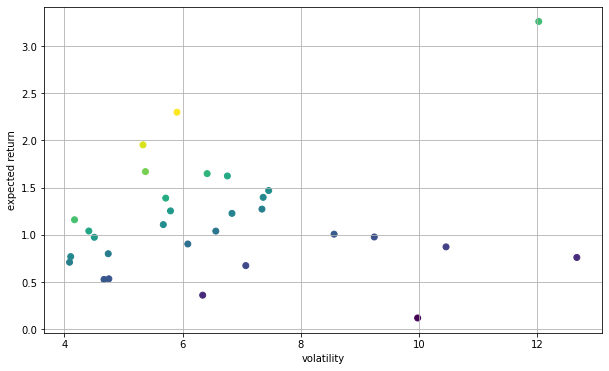

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(std, mean, c=mean/std, marker='o')
plt.grid(True)
plt.xlabel('volatility')
plt.ylabel('expected return')

## CVXOPT

- Markowitzの平均分散モデル
    $$
    \begin{split}
        \mathrm{argmin}_{x} \quad & x^T \Sigma x \\
        \mathrm{s.t.} \quad & r^T x \ge  r_e, \\
        & \left\lvert\lvert x \right\rvert\rvert_1 = 1,\\
        & x_i \ge 0 \quad (i = 1, \ldots, n)
    \end{split}
    $$

- CVXOPT
    $$
    \begin{split}
        \mathrm{argmin}_{x} \quad & \frac{1}{2} x^T P x + q^T x \\
        \mathrm{s.t.} \quad & G x \ge  h, \\
        & Ax = b
    \end{split}
    $$
 - Markowitzの平均分散モデルの場合
     $$
     P = 2 \cdot \Sigma, \quad q = 0, \quad G = - \left( \begin{array}{ccc} r_1 & \cdots & r_n \\ 1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & 1 \end{array} \right), \quad h = - \left( \begin{array}{c} r_e \\ 0 \\ \vdots \\ 0 \end{array} \right), \quad A = 1, \quad b=1
     $$

In [5]:
import cvxopt

In [6]:
r = df.mean().values
n = len(r)
r = np.reshape(r, (30, 1))
r_e = r.mean()
cov = df.cov().values
P = cvxopt.matrix(2.0 * cov)
q = cvxopt.matrix(np.zeros(shape=(n, 1)))
G = cvxopt.matrix(np.concatenate((-np.transpose(r), -np.identity(n)), axis=0))
h = cvxopt.matrix(np.concatenate((-np.ones(shape=(1,1))*r_e, np.zeros(shape=(n, 1))), axis=0))
A = cvxopt.matrix(np.ones(shape=(1, n)))
b = cvxopt.matrix(1.0)

sol = cvxopt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  6.7815e+00  7.0197e+00  6e+01  7e+00  2e+01
 1:  7.4405e+00  7.8167e+00  1e+01  2e+00  4e+00
 2:  8.7070e+00  9.8038e+00  5e+00  5e-01  1e+00
 3:  1.0397e+01  1.1818e+01  2e+00  2e-01  5e-01
 4:  1.1698e+01  1.2822e+01  1e+00  8e-02  2e-01
 5:  1.2747e+01  1.3267e+01  5e-01  3e-02  7e-02
 6:  1.3442e+01  1.3403e+01  4e-02  2e-16  1e-13
 7:  1.3413e+01  1.3412e+01  1e-03  4e-16  7e-13
 8:  1.3412e+01  1.3412e+01  4e-05  5e-16  4e-12
 9:  1.3412e+01  1.3412e+01  7e-07  6e-16  3e-11
Optimal solution found.


In [7]:
x_ops = list(sol['x'].T)

In [8]:
print(x_ops)

[1.0840140960856782e-05, 3.8583991063561555e-09, 0.004633358581431405, 7.88908107806494e-10, 5.090151768164035e-10, 0.2501309168925397, 9.512419155360028e-10, 0.21749173858883922, 3.3010168940419484e-10, 1.3551623179471508e-10, 1.8437510461092541e-10, 2.1006088358062477e-10, 9.94008210022049e-10, 2.4730605464251606e-10, 2.678151945415511e-10, 2.617393039729193e-10, 8.556963111821703e-10, 1.5746253559291228e-09, 3.9343164880920244e-10, 0.3415841203282818, 2.342745283106692e-09, 0.14092541072839876, 0.04522334689405867, 9.191374809824351e-10, 2.783157697049326e-10, 3.489926091851885e-10, 2.1654927571456174e-07, 7.126243342138831e-10, 1.3099959418081237e-09, 3.382216238807929e-08]


## PyPortfolioOpt

In [9]:
from pypfopt.efficient_frontier import EfficientFrontier

In [10]:
mu = df.mean().values
sigma = df.cov().values

In [11]:
# 分散最小化
ef = EfficientFrontier(mu, sigma)
print(ef.efficient_return(target_return=mu.mean()))

OrderedDict([(0, 0.0),
             (1, 0.0),
             (2, 0.0046358550289742),
             (3, 0.0),
             (4, 0.0),
             (5, 0.250135090631581),
             (6, 0.0),
             (7, 0.2174928823904148),
             (8, 0.0),
             (9, 0.0),
             (10, 0.0),
             (11, 0.0),
             (12, 0.0),
             (13, 0.0),
             (14, 0.0),
             (15, 0.0),
             (16, 0.0),
             (17, 0.0),
             (18, 0.0),
             (19, 0.3415877830167532),
             (20, 0.0),
             (21, 0.1409277323325723),
             (22, 0.0452206565997043),
             (23, 0.0),
             (24, 0.0),
             (25, 0.0),
             (26, 0.0),
             (27, 0.0),
             (28, 0.0),
             (29, 0.0)])

In [12]:
# シャープレシオ最大化
ef = EfficientFrontier(mu, sigma)
print(ef.max_sharpe())

OrderedDict([(0, 0.0),
             (1, 0.0),
             (2, 0.0),
             (3, 0.0),
             (4, 0.0),
             (5, 0.1503313064855197),
             (6, 0.0),
             (7, 0.0),
             (8, 0.0),
             (9, 0.0),
             (10, 0.0),
             (11, 0.0),
             (12, 0.0),
             (13, 0.0),
             (14, 0.0),
             (15, 0.0),
             (16, 0.0),
             (17, 0.0),
             (18, 0.0),
             (19, 0.0),
             (20, 0.0),
             (21, 0.2969139397811985),
             (22, 0.5527547537332818),
             (23, 0.0),
             (24, 0.0),
             (25, 0.0),
             (26, 0.0),
             (27, 0.0),
             (28, 0.0),
             (29, 0.0)])

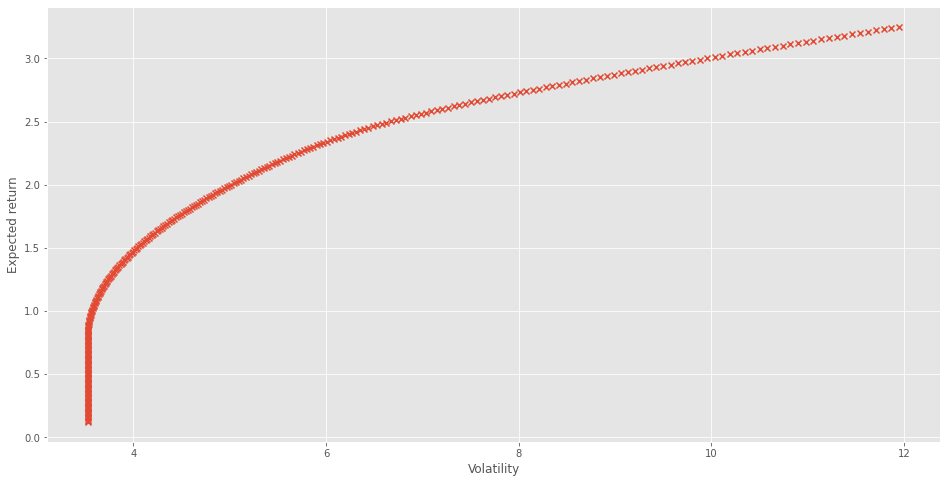

In [13]:
# 効率的フロンティア
mu = df.mean().values
sigma = df.cov().values
ef = EfficientFrontier(mu, sigma)

trets = np.arange(mu.min()+0.001, mu.max()-0.001, 0.01)
tvols = []
for tr in trets:
    w = ef.efficient_return(target_return=tr)
    w = pd.Series(w).values
    v = np.sqrt(np.dot(w.T, np.dot(np.array(sigma), w)))
    tvols += [v]
    
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(tvols, trets, marker='x')
ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')
ax.grid(True)
plt.show()

## Scipy

In [14]:
from scipy.optimize import minimize

In [15]:
mean = df.mean().values
cov = df.cov().values

In [16]:
class optimize_portforio():
    def __init__(self, mean:np.ndarray, cov:np.ndarray):
        self.mean = mean
        self.cov = cov
        self.n = len(mean)
    
    def min_func_var(self, weights:np.ndarray):
        return np.dot(weights.T, np.dot(self.cov, weights))
    
    def max_func_sharpe(self, weights:np.ndarray):
        expected_return = np.sum(self.mean * weights)
        risk = np.sqrt(self.min_func_var(weights))
        return - expected_return / risk
    
    def opt_port_min_risk(self, tret, x0=None, bounds=None):
        if not x0:
            x0 = np.ones(shape=(self.n, 1)) / self.n
        if not bounds:
            bounds = [(0, None)] * self.n
        constrains = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
            {'type': 'ineq', 'fun': lambda x: np.sum(self.mean*x) - tret}]
        opts = minimize(
            fun=self.min_func_var, 
            x0=x0, 
            method='SLSQP', 
            bounds=bounds, 
            constraints=constrains)
        return opts
    
    def opt_port_max_sharpe(self, tret, x0=None, bounds=None):
        if not x0:
            x0 = np.ones(shape=(self.n, 1)) / self.n
        if not bounds:
            bounds = [(0, None)] * self.n
        constrains = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
            {'type': 'ineq', 'fun': lambda x: np.sum(self.mean*x) - tret}]
        opts = minimize(
            fun=self.max_func_sharpe, 
            x0=x0, 
            method='SLSQP', 
            bounds=bounds, 
            constraints=constrains)
        return opts

In [17]:
port = optimize_portforio(mean, cov)

In [18]:
%%time
tret = mean.mean()
opts_min_risk = port.opt_port_min_risk(tret)
opts_max_sharpe = port.opt_port_max_sharpe(0)

Wall time: 35.6 ms


In [21]:
print(opts_min_risk)

     fun: 13.41202182154968
     jac: array([24.42104781, 26.99900901, 22.48584282, 33.65881681, 34.17079699,
       26.82285929, 34.31759727, 26.17550206, 36.16084898, 43.55302405,
       45.9805479 , 43.84885943, 34.62270629, 40.30942607, 50.87102306,
       38.80078006, 32.9076674 , 31.20204008, 38.54381478, 24.70216334,
       25.60466945, 31.12920058, 33.00602663, 28.23909843, 37.3284086 ,
       35.82954133, 29.8403964 , 32.80647755, 31.84382689, 25.9614507 ])
 message: 'Optimization terminated successfully'
    nfev: 314
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([8.83108286e-15, 0.00000000e+00, 4.63634642e-03, 0.00000000e+00,
       0.00000000e+00, 2.50145830e-01, 0.00000000e+00, 2.17483660e-01,
       4.37702723e-14, 1.02202360e-13, 2.35607505e-13, 1.09991924e-13,
       0.00000000e+00, 7.54028086e-14, 2.49281050e-13, 2.16343875e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.41587648e-01,
       0.00000000e+00, 1.40923756e-01, 4.5222759

In [20]:
print(opts_max_sharpe)

     fun: -0.39895527704807754
     jac: array([ 6.45706728e-02,  3.22613381e-02,  1.49487376e-01,  1.58993501e-01,
        2.24376932e-01,  2.92520970e-04,  8.40744525e-02,  5.23269027e-02,
        1.95259225e-01,  4.31938887e-01,  1.71358131e-01,  2.72376593e-01,
        5.89723028e-02,  2.23776262e-01,  3.27424444e-02,  2.10877847e-01,
        1.06217273e-01,  1.92726120e-01,  2.38010358e-01,  1.31961703e-02,
        1.37081694e-01,  5.10364771e-07, -8.79578292e-05,  1.74149498e-01,
        1.76328324e-01,  1.39104959e-01,  2.46671028e-02,  4.46624011e-02,
        8.14312100e-02,  1.03944343e-01])
 message: 'Optimization terminated successfully'
    nfev: 279
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([8.20211562e-17, 1.19841305e-16, 2.26008618e-16, 0.00000000e+00,
       0.00000000e+00, 1.62120553e-01, 0.00000000e+00, 9.11257895e-17,
       0.00000000e+00, 0.00000000e+00, 1.27916465e-16, 3.09656189e-16,
       1.51505995e-16, 0.00000000e+00, 2.26147087e-16, 